In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('HR_comma_sep.csv')
print (df.info()) #474241623
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# rename some columns
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department'}, 
          inplace=True)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
print ('Departments:')
print (df['department'].value_counts())
print ('\nSalary:')
print (df['salary'].value_counts())

Departments:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [7]:
'''
satisfaction_level | Satisfaction level of employee based on survey | Continuous | [0.09, 1]
last_evaluation | Score based on employee's last evaluation | Continuous | [0.36, 1]
number_project | Number of projects | Continuous | [2, 7]
average_monthly_hours | Average monthly hours | Continuous | [96, 310]
time_spend_company | Years at company | Continuous | [2, 10]
Work_accident | Whether employee had a work accident | Categorical | {0, 1}
left | Whether employee had left (Outcome Variable) | Categorical | {0, 1}
promotion_last_5years | Whether employee had a promotion in the last 5 years | Categorical | {0, 1}
department | Department employee worked in | Categorical | 10 departments
salary | Level of employee's salary | Categorical | {low, medium, high}
'''

"\nsatisfaction_level | Satisfaction level of employee based on survey | Continuous | [0.09, 1]\nlast_evaluation | Score based on employee's last evaluation | Continuous | [0.36, 1]\nnumber_project | Number of projects | Continuous | [2, 7]\naverage_monthly_hours | Average monthly hours | Continuous | [96, 310]\ntime_spend_company | Years at company | Continuous | [2, 10]\nWork_accident | Whether employee had a work accident | Categorical | {0, 1}\nleft | Whether employee had left (Outcome Variable) | Categorical | {0, 1}\npromotion_last_5years | Whether employee had a promotion in the last 5 years | Categorical | {0, 1}\ndepartment | Department employee worked in | Categorical | 10 departments\nsalary | Level of employee's salary | Categorical | {low, medium, high}\n"

In [8]:
# correlated coefficient matrix of random two variables
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

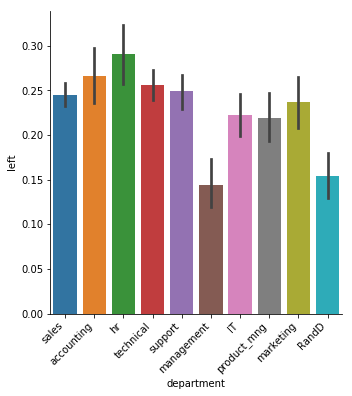

In [27]:
# find the relationship between department and left
plot = sns.catplot(x='department', y='left', kind='bar', data=df)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

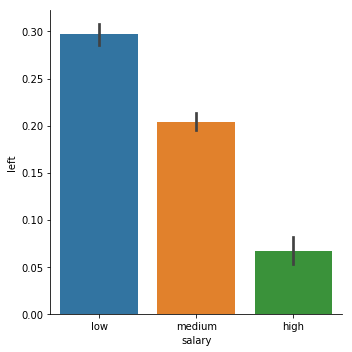

In [11]:
# Attrition by salary level
plot = sns.catplot(x='salary', y='left', kind='bar', data=df);

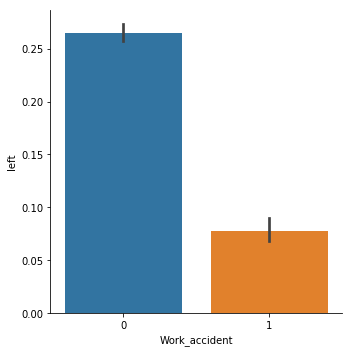

In [12]:
# whether employee had work accident
plot = sns.catplot(x='Work_accident', y='left', kind='bar', data=df);

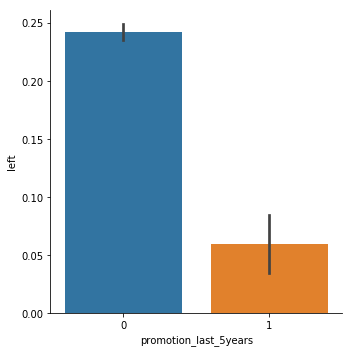

In [13]:
#whether employee had promotion in last 5 years
plot = sns.catplot(x='promotion_last_5years', y='left', kind='bar', data=df);

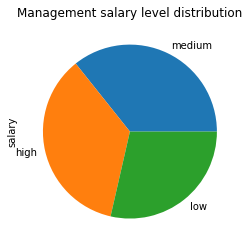

In [9]:
df[df['department']=='management']['salary'].value_counts().plot(kind='pie', title='Management salary level distribution');

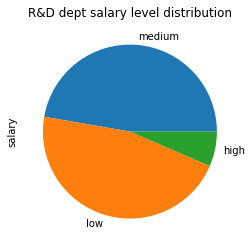

In [10]:
df[df['department']=='RandD']['salary'].value_counts().plot(kind='pie', title='R&D dept salary level distribution');

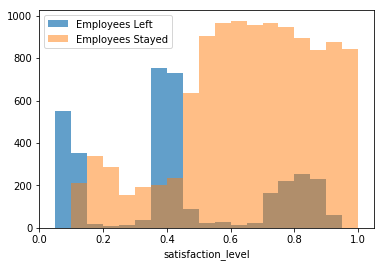

In [11]:
#satisfaction_level
bins = np.linspace(0.0001, 1.0001, 21)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=0.7, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha=0.5, label='Employees Stayed')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

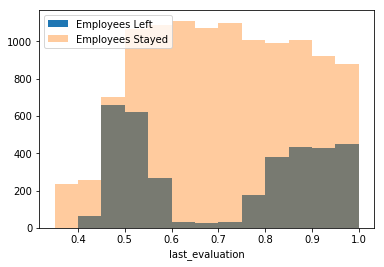

In [12]:
# Last evaluation
bins = np.linspace(0.3501, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('last_evaluation')
#plt.grid(axis='x')
plt.legend(loc='best');

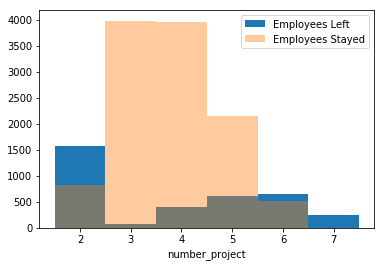

In [13]:
# Number of projects 
bins = np.linspace(1.5, 7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('number_project')
#plt.grid(axis='x')
plt.legend(loc='best');

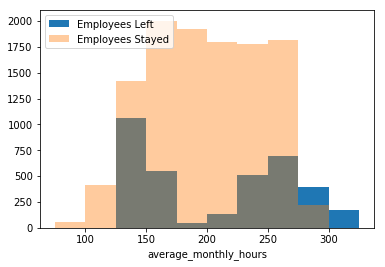

In [14]:
# Average monthly hours
bins = np.linspace(75, 325, 11)
plt.hist(df[df['left']==1]['average_monthly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_monthly_hours'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('average_monthly_hours')
plt.legend(loc='best');

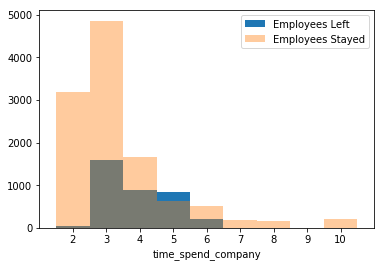

In [15]:
# Years at company 
bins = np.linspace(1.5, 10.5, 10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('time_spend_company')
plt.xlim((1,11))
#plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best');

In [17]:
X = df.drop('left', axis=1)
y = df['left']
X.drop(['department','salary'], axis=1, inplace=True)

# One-hot encoding
salary_dummy = pd.get_dummies(df['salary'])
department_dummy = pd.get_dummies(df['department'])
X = pd.concat([X, salary_dummy], axis=1)
X = pd.concat([X, department_dummy], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [18]:
# Split Training Set from Testing Set (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# an example of Standerscaler
from sklearn.preprocessing import StandardScaler
X_example = np.array([[ 10., -2.,  23.],
                      [ 5.,  32.,  211.],
                      [ 10.,  1., -130.]])
stdsc = StandardScaler()
X_example = stdsc.fit_transform(X_example)
X_example = pd.DataFrame(X_example)
print (X_example)
X_example.describe()

          0         1         2
0  0.707107 -0.802454 -0.083658
1 -1.414214  1.409716  1.264429
2  0.707107 -0.607262 -1.180771


,0,1,2
count,3.000000e+00,3.000000e+00,3.000000e+00
mean,-2.960595e-16,-1.110223e-16,7.401487e-17
std,1.224745e+00,1.224745e+00,1.224745e+00
min,-1.414214e+00,-8.024539e-01,-1.180771e+00
25%,-3.535534e-01,-7.048582e-01,-6.322145e-01
50%,7.071068e-01,-6.072624e-01,-8.365788e-02
75%,7.071068e-01,4.012270e-01,5.903856e-01
max,7.071068e-01,1.409716e+00,1.264429e+00


In [23]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train.astype(float))
#print (X_train_std[0])
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test.astype(float))

In [21]:
# Cross validation
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.3)

In [25]:
# Model: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

rf_param = {'n_estimators': range(1,11)}
rf_grid = GridSearchCV(rf_model, rf_param, cv=cv)
rf_grid.fit(X_train, y_train)
print('Parameter with best score:')
print(rf_grid.best_params_)
print('Cross validation score:', rf_grid.best_score_)

Parameter with best score:
{'n_estimators': 10}
Cross validation score: 0.984984126984127


In [24]:
best_rf = rf_grid.best_estimator_
print('Test score:', best_rf.score(X_test, y_test))

Test score: 0.9866666666666667


In [25]:
# feature importance scores
features = X.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,satisfaction_level,0.300409
4,time_spend_company,0.193789
2,number_project,0.166814
1,last_evaluation,0.148177
3,average_monthly_hours,0.140296
8,low,0.011769
5,Work_accident,0.010372
7,high,0.003652
19,technical,0.003630
17,sales,0.003172


In [26]:
features_df['Importance Score'][:5].sum()

0.9494854286777494

In [28]:
data = pd.read_csv('HR_comma_sep.csv')

In [29]:
from sklearn.cluster import KMeans
kmeans_df =  data[data.left == 1].drop([ u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
kmeans.cluster_centers_

array([[0.80851586, 0.91170931],
       [0.11115466, 0.86930085],
       [0.41014545, 0.51698182]])

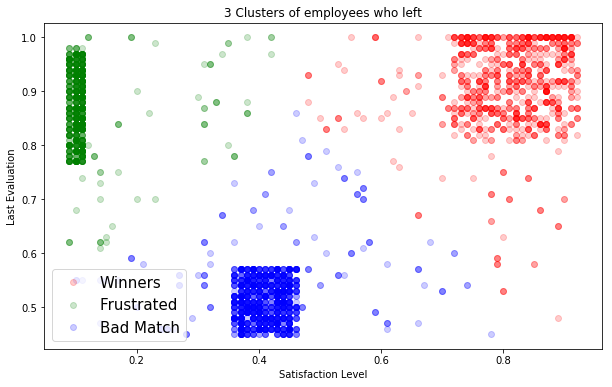

In [39]:
left = data[data.left == 1].copy()
left['label'] = kmeans.labels_
plt.figure(figsize = (10,6))
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.plot(left.satisfaction_level[left.label==0],left.last_evaluation[left.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(left.satisfaction_level[left.label==1],left.last_evaluation[left.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(left.satisfaction_level[left.label==2],left.last_evaluation[left.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Winners','Frustrated','Bad Match'], loc = 3, fontsize = 15,frameon=True)